<h1 align="center">Контрольные вопросы (0 % - для самоконтроля) </h1> 

<h2 align="center">Практическое задание 1 (30%) </h2>
Реализуйте PCA

In [1]:
import numpy as np
import pylab as plt
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    #     F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    Sigma = 1.0 / l * np.dot(F.T, F)
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V
    
    U, d, V = np.linalg.svd(F.T)

    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / \
                dTot * 100.0 for i in range(n)])
    m = np.argmax(var_i > varRetained*100)
    print '{}.2f %% variance retained in {} dimensions'.format(var_i[m], m)

    # plot the variance plot
    if show:
        plt.plot(var_i)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    # compute the reduced dimensional features by projection
    U_reduced = V.T[:, :m]
    G = np.dot(F.T, U_reduced)

    return G, U_reduced

In [2]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

Performing PCA - Principal COmponent Analysis
95.0721370382.2f %% variance retained in 40 dimensions


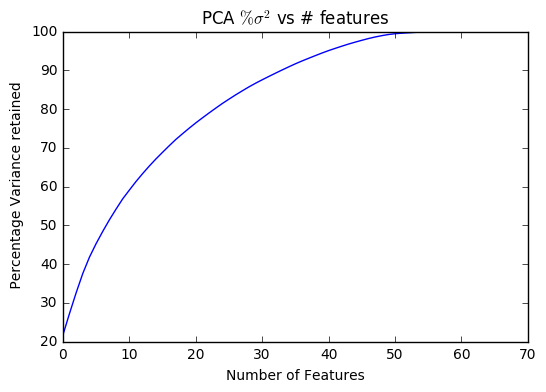

In [3]:
#################################################################
# PCA of training set
print 'Performing PCA - Principal COmponent Analysis'

Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)

In [4]:
print Z
print U_reduced

[[  4.58612772e+01  -1.19211574e+00   2.11000593e+01 ...,   2.77637672e+00
    1.08339635e+00   2.79603567e-01]
 [  5.55296793e+01   7.86176977e+00  -2.04871986e+01 ...,  -2.06566530e+00
   -2.62347905e-01   7.24943377e-01]
 [  5.58278837e+01   6.91459576e+00  -9.66245273e+00 ...,  -8.64029615e-03
    1.03407080e+00   3.32564400e+00]
 ..., 
 [  6.55269853e+01   1.06587286e+01  -6.29456080e+00 ...,  -1.17825609e+00
    4.24475769e-01  -1.06720963e+00]
 [  5.86061659e+01  -4.91125210e+00   1.27231523e+01 ...,   1.33324857e-01
   -7.77839257e-01   5.10143077e-01]
 [  6.44482310e+01  -4.55513470e-01   7.04184347e+00 ...,  -6.63237391e-01
   -1.06715047e+00   4.76893855e+00]]
[[  1.74588012e-18  -6.78969169e-19   1.31513399e-17 ...,   1.03367871e-16
    4.13215196e-17   1.11846999e-17]
 [  5.77192878e-03  -1.73619371e-02  -9.85740003e-03 ...,  -2.21436704e-02
   -1.05228027e-02  -6.43467663e-02]
 [  1.00696020e-01  -2.24200800e-01  -4.48071690e-02 ...,   6.98896788e-02
   -9.96581450e-02   

<h1 align="center"><h2 align="center">Практическое задание 2 (40%) </h2> </h1>

<h2 align="left">Изучение алгоритмов кластеризации на разных выборках</h2>

### Кластеризация цифр с помощью dbscan
На данных из sklearn.datasets.load_digits примените алгоритмы кластеризации (знания о метках классов при кластеризации использовать нельзя):
 - <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN'>dbscan </a> 
 запускайте при различных параметрах eps и minsamples, для всех экспериментов можете выбрать одну метрику (вспомните семинар про  метрические алгоритмы);
 - Используя метки классов цифр, оцените качество различных кластеризаций при помощи Adjusted Mutual Information и Adjusted Rand Index. 
 - визуалируйте изображения тех цифр, которые соответствуют core_points;
 - визуалируйте изображения тех цифр, которые соответствуют выбросам;
 - сделайте выводы и применимости алгоритмов.

### Уменьшение палитры изображения
 - для <a href="https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg"> картинки </a> 
нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселам изображения; после выделения кластеров,
все пикселы, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру. 
 - Попробуйте различные алгоритмы кластеризации:
        -- KMeans
        -- MeanShift
        -- AgglomerativeClustering
   Рассмотрите число кластеров K = 2, 3, 10, 20
 - Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи
метрики <a href="http://scikit-image.org/docs/dev/api/skimage.measure.html"> SSIM</a>. Какой способ оказался лучшим?

In [5]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
%matplotlib inline

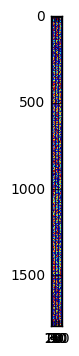

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits['data']
target = digits['target']
plt.imshow(X)

In [7]:
PCA_X = PCA().fit_transform(X)
transformedX = TSNE().fit_transform(PCA_X)

In [8]:
eps = np.linspace(1, 2, 10)
samp = np.linspace(8, 20, 13)
for epsilon in eps:
    for min_samples in samp:
        db = DBSCAN(eps=epsilon, min_samples=min_samples, n_jobs=-1).fit(transformedX)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        result = (metrics.adjusted_rand_score(target, labels),
                  metrics.adjusted_mutual_info_score(target, labels))
        print "epsilon = " + str(epsilon)
        print "min_samples = " + str(min_samples)
        print "Estimated number of clusters: {}".format(n_clusters_)
        print "Adjusted Rand Index: {}".format(result[0])
        print "Adjusted Mutual Information: {}".format(result[1])
        print "*********************************************************************************"

epsilon = 1.0
min_samples = 8.0
Estimated number of clusters: 25
Adjusted Rand Index: 0.769117650365
Adjusted Mutual Information: 0.760470119019
*********************************************************************************
epsilon = 1.0
min_samples = 9.0
Estimated number of clusters: 24
Adjusted Rand Index: 0.736403541699
Adjusted Mutual Information: 0.741920922177
*********************************************************************************
epsilon = 1.0
min_samples = 10.0
Estimated number of clusters: 23
Adjusted Rand Index: 0.721503573989
Adjusted Mutual Information: 0.736892346235
*********************************************************************************
epsilon = 1.0
min_samples = 11.0
Estimated number of clusters: 25
Adjusted Rand Index: 0.623322211451
Adjusted Mutual Information: 0.689310626822
*********************************************************************************
epsilon = 1.0
min_samples = 12.0
Estimated number of clusters: 28
Adjusted Rand Index: 0.5

In [9]:
epsilon = 2
min_samples = 11
db = DBSCAN(eps=epsilon, min_samples=min_samples, n_jobs=-1).fit(transformedX)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
result = (metrics.adjusted_rand_score(target, labels),
          metrics.adjusted_mutual_info_score(target, labels))
print "Best result:"
print "epsilon = " + str(epsilon)
print "min_samples = " + str(min_samples)
print "Estimated number of clusters: {}".format(n_clusters_)
print "Adjusted Rand Index: {}".format(result[0])
print "Adjusted Mutual Information: {}".format(result[1])

Best result:
epsilon = 2
min_samples = 11
Estimated number of clusters: 17
Adjusted Rand Index: 0.839286321743
Adjusted Mutual Information: 0.827051414527


/usr/local/lib/python2.7/dist-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


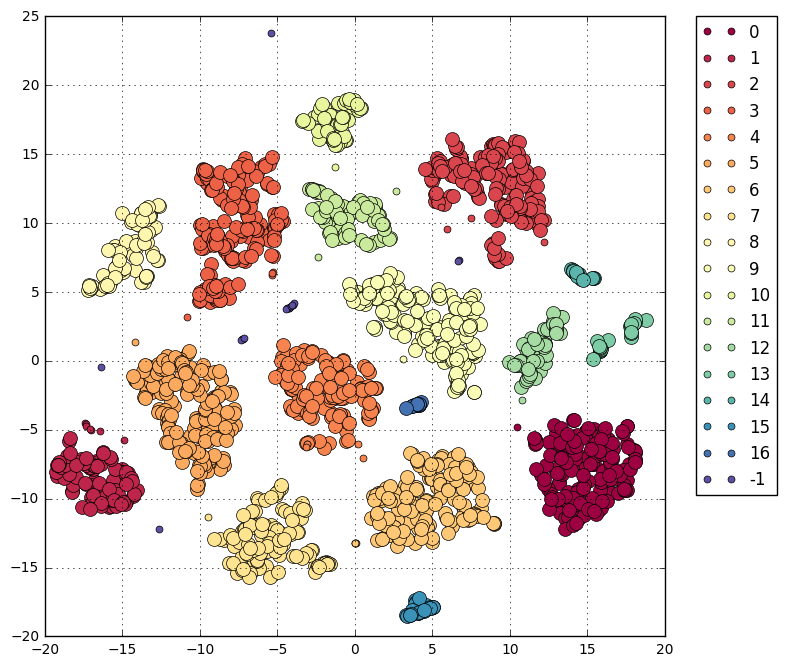

In [10]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(8, 8))

for lab, color in zip(unique_labels, colors):
    class_member_mask = (labels == lab)

    xy = transformedX[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color,
            markeredgecolor='k', markersize=10)
    xy = transformedX[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color,
            markeredgecolor='k', markersize=5, label=lab)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

core points of 0 cluster


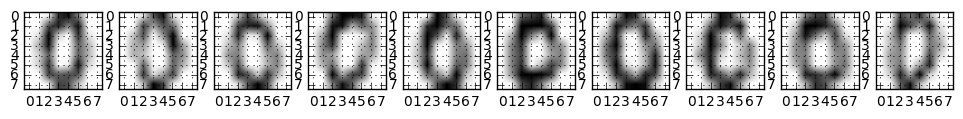

core points of 1 cluster


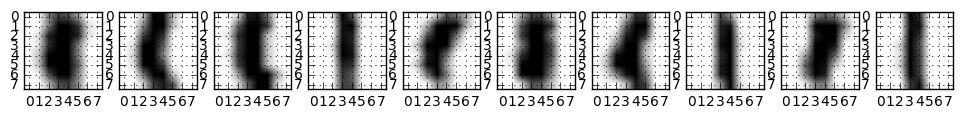

core points of 2 cluster


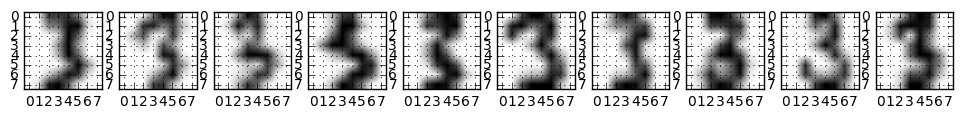

core points of 3 cluster


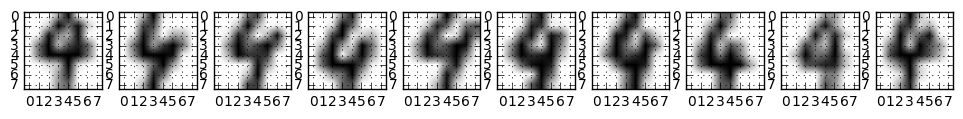

core points of 4 cluster


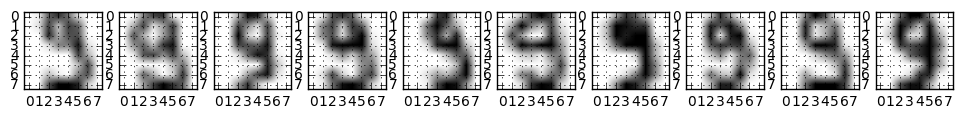

core points of 5 cluster


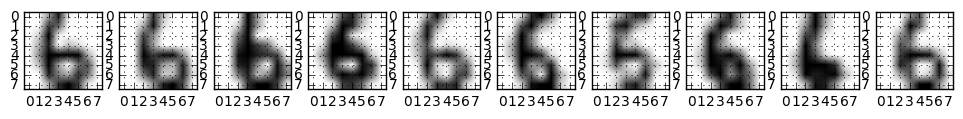

core points of 6 cluster


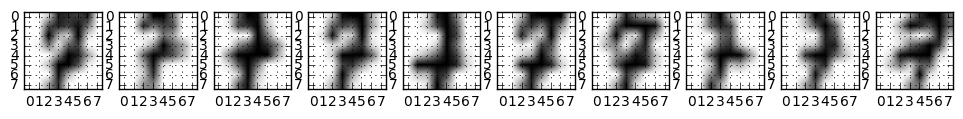

core points of 7 cluster


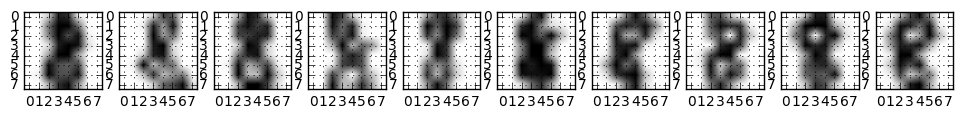

core points of 8 cluster


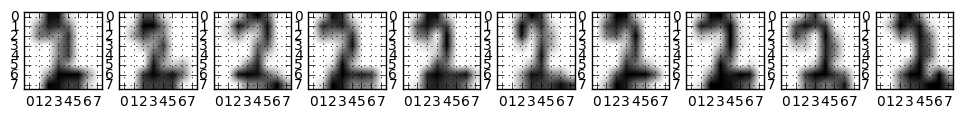

core points of 9 cluster


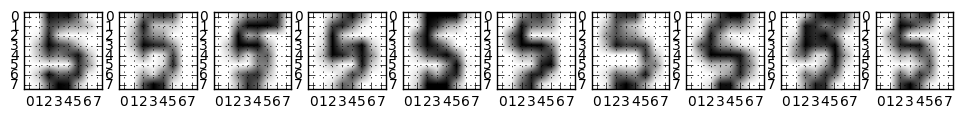

core points of 10 cluster


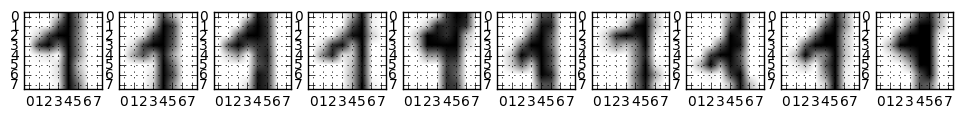

core points of 11 cluster


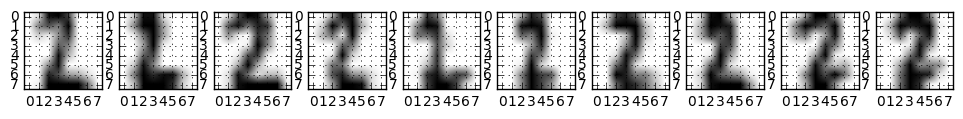

core points of 12 cluster


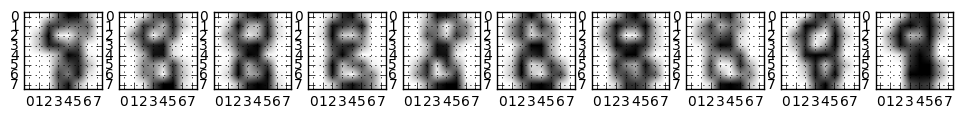

core points of 13 cluster


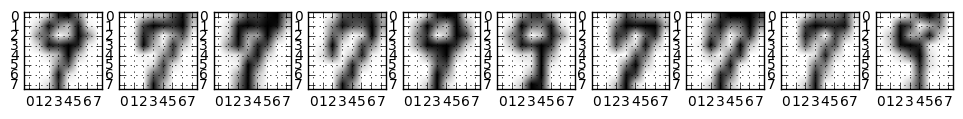

core points of 14 cluster


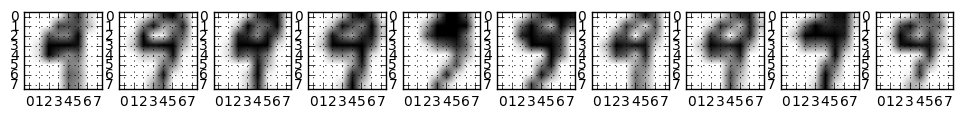

core points of 15 cluster


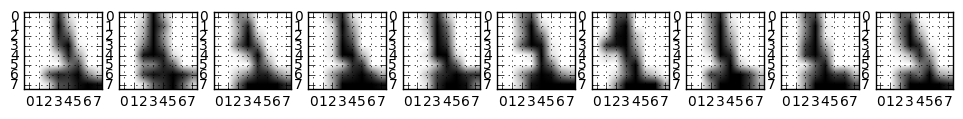

core points of 16 cluster


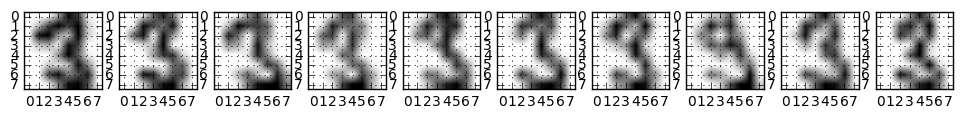

noise


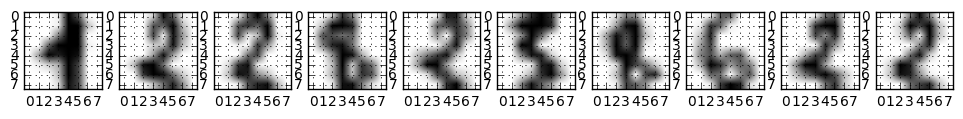

In [11]:
import random

for lab in set(labels):
    plt.figure(figsize=(12, 1))
    class_member_mask = (labels == lab)
    if lab == -1:
        print('noise')
        images = random.sample(list(X[class_member_mask]), min(10, len(list(X[class_member_mask]))))
    else:
        print('core points of {} cluster'.format(lab))
        images = random.sample(list(X[class_member_mask & core_samples_mask]), 10)
    for j, image in enumerate(images):
        plt.subplot(1, 10, j + 1)
        plt.imshow(image.reshape((8, 8)), cmap='binary')
        plt.grid(True)
    plt.show()